## Maestría en Explotación de Datos y Gestión del Conocimiento - 2021
## Introducción a Data Mining
### Caso 2 - Telco Co.

#### __Integrantes:__
1. Martín Gardel 
2. Dario Ubeda 
3. José Ignacio Segret 
4. Augusto de Biassi 
5. Fernando Bloise 
6. Rafael Aguilar
7. Santiago Dellachiesa



In [1]:
# Para iniciar la exploración de datos se importan las librerías requeridas para tener acceso a las funciones que permitan el procedimiento
# IMPORTANDO LIBRERÍAS

#Analisis de Datos
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

#Desactivacion de warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action= "ignore", category= FutureWarning )

#Representacion gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

%load_ext autotime

time: 0 ns (started: 2021-08-23 15:57:03 -03:00)


In [4]:
# CARGANDO SET DE DATOS USANDO PANDAS

datos_churn = pd.read_csv ("Churn_Augusto.csv")
print("El set de datos fue cargado satisfactoriamente.")

El set de datos fue cargado satisfactoriamente.
time: 15 ms (started: 2021-08-23 16:02:43 -03:00)


In [5]:
datos_churn

State  Account_Length  Area_Code     Phone Intl_Plan Vmail_Plan  \
0       KS             128        415  382-4657        no        yes   
1       OH             107        415  371-7191        no        yes   
2       NJ             137        415  358-1921        no         no   
3       OH              84        408  375-9999       yes         no   
4       OK              75        415  330-6626       yes         no   
...    ...             ...        ...       ...       ...        ...   
3094    MN              91        415  382-9297        no         no   
3095    AL             181        415  330-9294        no        yes   
3096    CO             118        415  362-8763        no        yes   
3097    ME             112        415  403-4816        no         no   
3098    GA              93        415  371-2155        no         no   

      Vmail_Message  Day_Mins  Day_Calls  Day_Charge  ...  Eve_Charge  \
0                25     265.1        110       45.07  ...       16.78   
1                26     161.6        123       27.47  ...       16.62   
2                 0     243.4        114       41.38  ...       10.30   
3                 0     299.4         71       50.90  ...        5.26   
4                 0     166.7        113       28.34  ...       12.61   
...             ...       ...        ...         ...  ...         ...   
3094              0     133.8         61       22.75  ...       13.50   
3095             27     190.3         93       32.35  ...       21.17   
3096             36     294.9        106       50.13  ...       14.08   
3097              0     185.4        114       31.52  ...       16.27   
3098              0     179.5        121       30.52  ...       16.31   

      Night_Mins  Night_Calls  Night_Charge  Intl_Mins  Intl_Calls  \
0          244.7           91         11.01       10.0           3   
1          254.4          103         11.45       13.7           3   
2          162.6          104          7.32       12.2           5   
3          196.9           89          8.86        6.6           7   
4          186.9          121          8.41       10.1           3   
...          ...          ...           ...        ...         ...   
3094       189.6           92          8.53       10.5           2   
3095       215.7           82          9.71       10.6           4   
3096       189.2           63          8.51        9.8           5   
3097       144.0           78          6.48       10.0          11   
3098       165.5          125          7.45       12.0           4   

      Intl_Charge  CustServ_Calls  Churn  Churn_code  
0            2.70               1  False           0  
1            3.70               1  False           0  
2            3.29               0  False           0  
3            1.78               2  False           0  
4            2.73               3  False           0  
...           ...             ...    ...         ...  
3094         2.84               1  False           0  
3095         2.86               1  False           0  
3096         2.65               3  False           0  
3097         2.70               2  False           0  
3098         3.24               0  False           0  

[3099 rows x 22 columns]

time: 32 ms (started: 2021-08-23 16:02:44 -03:00)


### Variables Meaning:
1. __State:__ categorical, for the 50 states and the District of Columbia
2. __Account length:__ integer valued, how long account has been active
3. __Area code:__ categorical
4. __Phone number:__ essentially a surrogate for customer ID
___
5. __International Plan:__ dichotomous categorical, yes or no
6. __VoiceMail Plan:__ dichotomous categorical, yes or no
7. __Number of voice mail messages:__ integer valued
___
8. __Total day minutes:__ continuous, minutes customer used service during the day
9. __Total day calls:__ integer valued
10. __Total day charge:__ continuous, perhaps based on foregoing two variables
___
11. __Total evening minutes:__ continuous, minutes customer used service during the evening
12. __Total evening calls:__ integer valued
13. __Total evening charge:__ continuous, perhaps based on foregoing two variables
___
14. __Total night minutes:__ continuous, minutes customer used service during the night
15. __Total night calls:__ integer valued
16. __Total night charge:__ continuous, perhaps based on foregoing two variables
___
17. __Total international minutes:__ continuous, minutes customer used service to make international calls
18. __Total international calls:__ integer valued
19. __Total international charge:__ continuous, perhaps based on foregoing two variables
___
20. __Number of calls to customer service:__ integer valued.

# EDA

In [6]:
# CONSULTANDO NÚMERO DE FILAS Y COLUMNAS (filas x columnas)
print('Cantidad de Filas y columnas=',datos_churn.shape)

Cantidad de Filas y columnas= (3099, 22)
time: 0 ns (started: 2021-08-23 16:02:52 -03:00)


In [7]:
# Consultamos la cantidad de valores faltantes por columna
valoresFaltantes_count = datos_churn.isnull().sum()
print(valoresFaltantes_count[0:20000])

State             0
Account_Length    0
Area_Code         0
Phone             0
Intl_Plan         0
Vmail_Plan        0
Vmail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn             0
Churn_code        0
dtype: int64
time: 16 ms (started: 2021-08-23 16:02:54 -03:00)


In [8]:
# Consultamos el porcentaje de valores faltantes por columna
datos_churn.isnull().sum().sort_values(ascending=False)/len(datos_churn)*100

Churn_code        0.0
Churn             0.0
Account_Length    0.0
Area_Code         0.0
Phone             0.0
Intl_Plan         0.0
Vmail_Plan        0.0
Vmail_Message     0.0
Day_Mins          0.0
Day_Calls         0.0
Day_Charge        0.0
Eve_Mins          0.0
Eve_Calls         0.0
Eve_Charge        0.0
Night_Mins        0.0
Night_Calls       0.0
Night_Charge      0.0
Intl_Mins         0.0
Intl_Calls        0.0
Intl_Charge       0.0
CustServ_Calls    0.0
State             0.0
dtype: float64

time: 46 ms (started: 2021-08-23 16:02:58 -03:00)


In [9]:
# Consultamos los tipos de datos presentes en el dataset
datos_churn.dtypes

State              object
Account_Length      int64
Area_Code           int64
Phone              object
Intl_Plan          object
Vmail_Plan         object
Vmail_Message       int64
Day_Mins          float64
Day_Calls           int64
Day_Charge        float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Charge        float64
Night_Mins        float64
Night_Calls         int64
Night_Charge      float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Charge       float64
CustServ_Calls      int64
Churn                bool
Churn_code          int64
dtype: object

time: 0 ns (started: 2021-08-23 16:03:02 -03:00)


### Comentario:

In [10]:
datos_churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code'],
      dtype='object')

time: 15 ms (started: 2021-08-23 16:03:10 -03:00)


In [11]:
# Consultamos las estadísticas básicas de variables cuantitativas del dataset 
datos_churn.describe()

Account_Length    Area_Code  Vmail_Message     Day_Mins    Day_Calls  \
count      3099.00000  3099.000000    3099.000000  3099.000000  3099.000000   
mean        101.18393   437.191029       8.074540   179.596999   100.366570   
std          39.85297    42.365585      13.668535    54.632572    20.081223   
min           1.00000   408.000000       0.000000     0.000000     0.000000   
25%          74.00000   411.500000       0.000000   143.900000    87.000000   
50%         101.00000   415.000000       0.000000   179.300000   101.000000   
75%         127.00000   510.000000      19.500000   216.000000   114.000000   
max         243.00000   510.000000      51.000000   350.800000   165.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  3099.000000  3099.000000  3099.000000  3099.000000  3099.000000   
mean     30.532043   201.024266   100.013875    17.087270   200.682995   
std       9.287510    50.900248    19.860313     4.326493    50.613708   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.460000   166.600000    87.000000    14.160000   167.000000   
50%      30.480000   201.300000   100.000000    17.110000   201.300000   
75%      36.720000   235.800000   113.500000    20.040000   235.150000   
max      59.640000   363.700000   168.000000    30.910000   395.000000   

       Night_Calls  Night_Charge    Intl_Mins   Intl_Calls  Intl_Charge  \
count  3099.000000   3099.000000  3099.000000  3099.000000  3099.000000   
mean     99.971281      9.030810    10.236528     4.462407     2.764372   
std      19.508605      2.277665     2.782396     2.441330     0.751239   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.060000    10.300000     4.000000     2.780000   
75%     113.000000     10.580000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    19.000000     5.400000   

       CustServ_Calls  Churn_code  
count     3099.000000  3099.00000  
mean         1.555340     0.14424  
std          1.312804     0.35139  
min          0.000000     0.00000  
25%          1.000000     0.00000  
50%          1.000000     0.00000  
75%          2.000000     0.00000  
max          9.000000     1.00000

time: 93 ms (started: 2021-08-23 16:03:24 -03:00)


In [12]:
# Realizamos la descripción estadística básica correspondiente a las variables cualitativas
datos_churn.describe(include='object')

State     Phone Intl_Plan Vmail_Plan
count   3099      3099      3099       3099
unique    51      3099         2          2
top       WV  329-1410        no         no
freq      96         1      2800       2244

time: 15 ms (started: 2021-08-23 16:03:30 -03:00)


### Proporciones entre True y False

In [17]:
pd.value_counts(datos_churn["Churn_code"]).plot.bar()
plt.title('Churn histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
datos_churn['Churn_code'].value_counts()

0    2652
1     447
Name: Churn_code, dtype: int64

time: 187 ms (started: 2021-08-23 16:04:54 -03:00)


### Gráficos categóricos

<AxesSubplot:title={'center':'Count of clients who churn according to the state'}, xlabel='State', ylabel='count'>

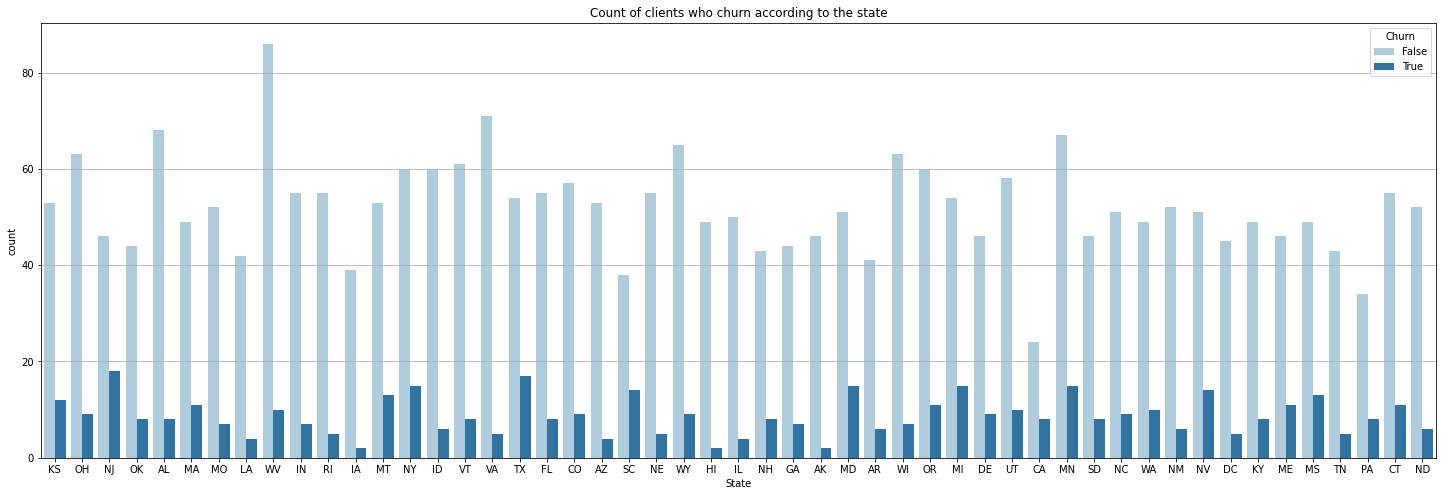

time: 1.81 s (started: 2021-08-23 16:05:25 -03:00)


In [18]:
# Analysis of people who took the car insurance according to their job type
fig = plt.figure(figsize=(25,8))


plt.title('Count of clients who churn according to the state')
plt.grid()
sns.countplot(data = datos_churn, x="State",hue="Churn", log= False, palette='Paired')

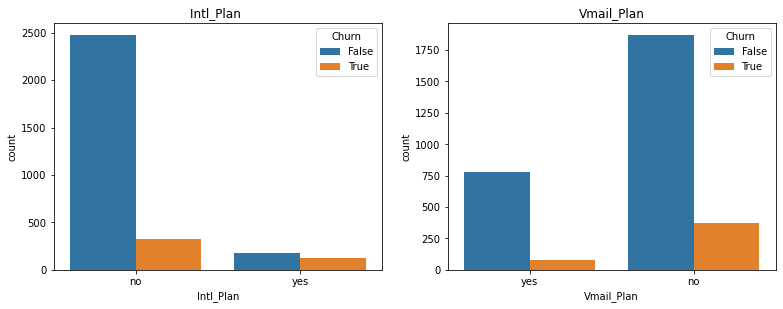

time: 516 ms (started: 2021-08-23 16:05:52 -03:00)


In [19]:
fig = plt.figure(figsize=(20,10))


#  subplot #5
plt.subplot(235)
plt.title('Intl_Plan ')
sns.countplot(x="Intl_Plan", data= datos_churn, hue= "Churn")

#  subplot #6
plt.subplot(236)
plt.title('Vmail_Plan')
#sns.distplot(train_data.Outcome, hue= "car_insurance")
sns.countplot(x="Vmail_Plan", data= datos_churn, hue= "Churn")


plt.show()


## Cuantitativos

[]

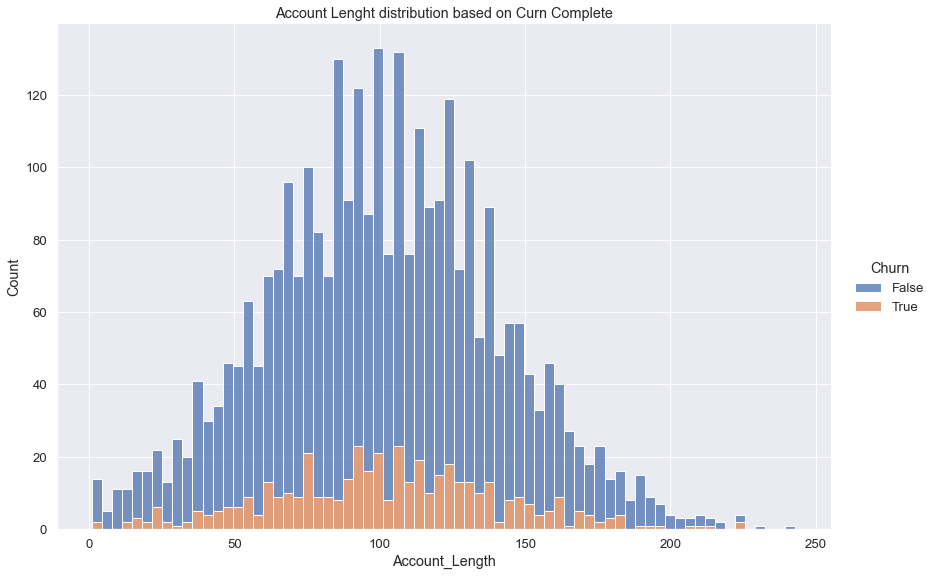

time: 781 ms (started: 2021-08-23 21:09:59 -03:00)


In [233]:
# ACCOUNT LENGHT
sns.displot(datos_churn, x="Account_Length", hue= 'Churn', bins=70, height=8, aspect=1.5/1, multiple="stack")
plt.title('Account Lenght distribution based on Curn Complete')
plt.plot()

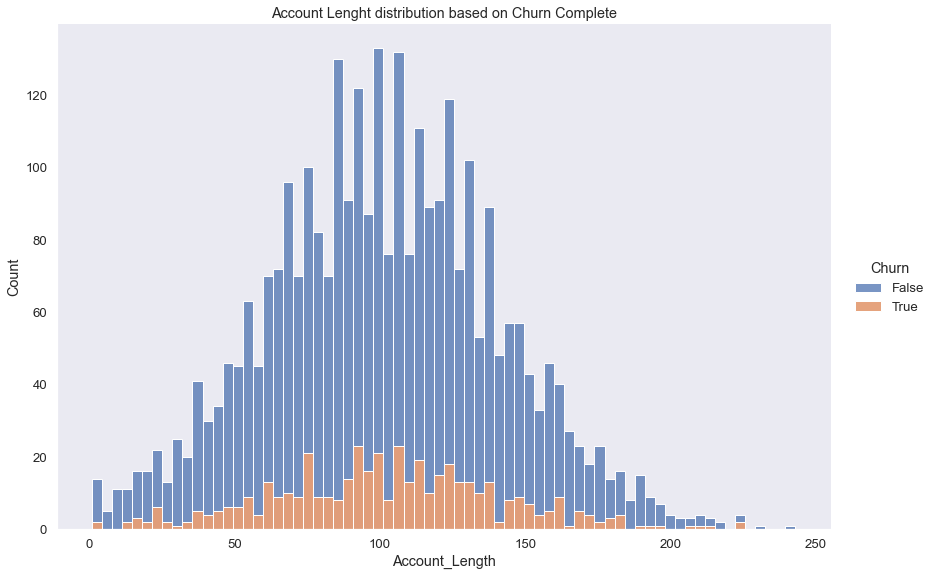

time: 797 ms (started: 2021-08-23 21:11:01 -03:00)


In [235]:
b = sns.displot(datos_churn, x="Account_Length", hue= 'Churn', bins=70, height=8, aspect=1.5/1, multiple="stack")
plt.title('Account Lenght distribution based on Churn Complete')
#b.axes.set_title("Title",fontsize=50)
#b.set_xlabel("X Label",fontsize=30)
#b.set_ylabel("Y Label",fontsize=20)
#b.tick_params(labelsize=5)
plt.grid()

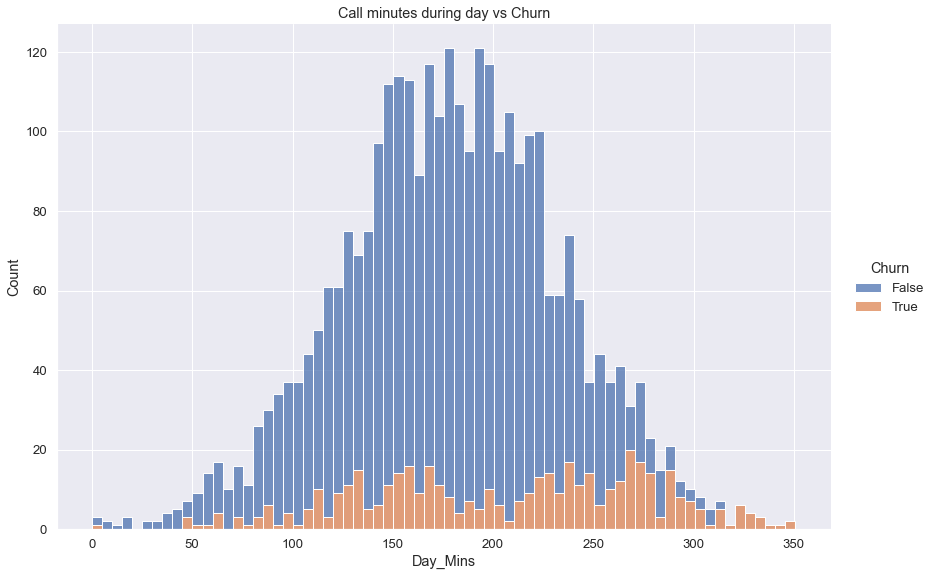

time: 859 ms (started: 2021-08-23 21:11:10 -03:00)


In [236]:
# DAY MINS
sns.displot(datos_churn, x="Day_Mins", hue= 'Churn', bins=70, height=8, aspect=1.5/1, multiple="stack")
plt.title('Call minutes during day vs Churn')
plt.show()

[]

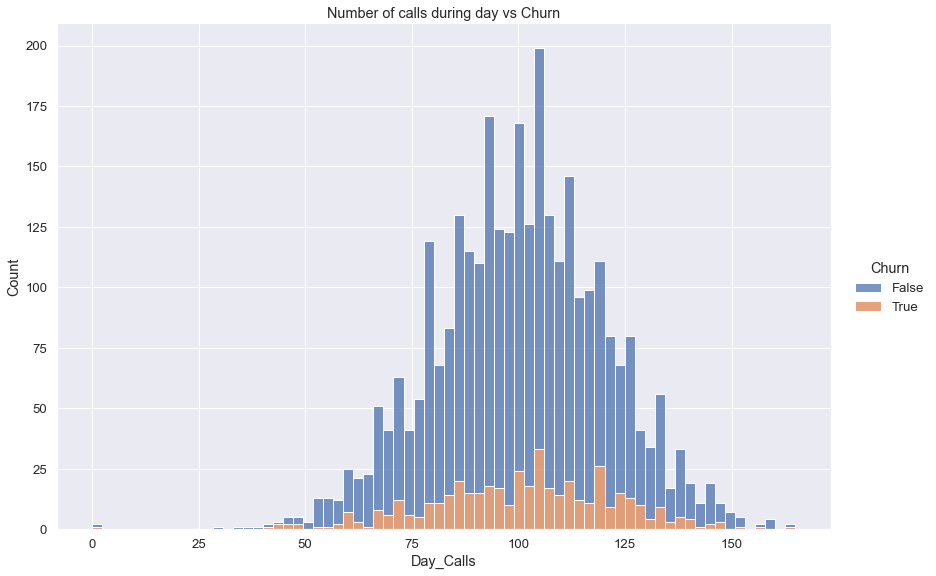

time: 2.08 s (started: 2021-08-23 21:09:47 -03:00)


In [232]:
# DAY CALLS
sns.displot(datos_churn, x="Day_Calls", hue= 'Churn', bins=70, height=8, aspect=1.5/1, multiple="stack")
plt.title('Number of calls during day vs Churn')
plt.plot()

In [238]:
# DAY CHARGE
sns.displot(datos_churn, x="Day_Charge", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Day charges')
plt.plot()


[]

time: 828 ms (started: 2021-08-23 21:13:12 -03:00)


[]

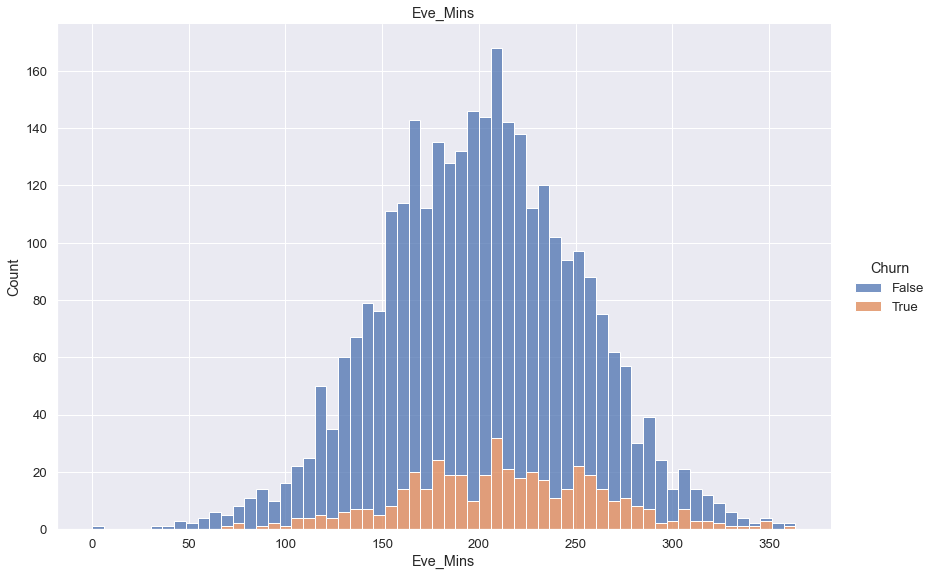

time: 984 ms (started: 2021-08-23 21:14:03 -03:00)


In [239]:
# EVENING MINS
sns.displot(datos_churn, x="Eve_Mins", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Eve_Mins')
plt.plot()


In [240]:
# EVENING CALLS
sns.displot(datos_churn, x="Eve_Calls", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Eve_Calls')
plt.plot()


[]

time: 828 ms (started: 2021-08-23 21:14:36 -03:00)


[]

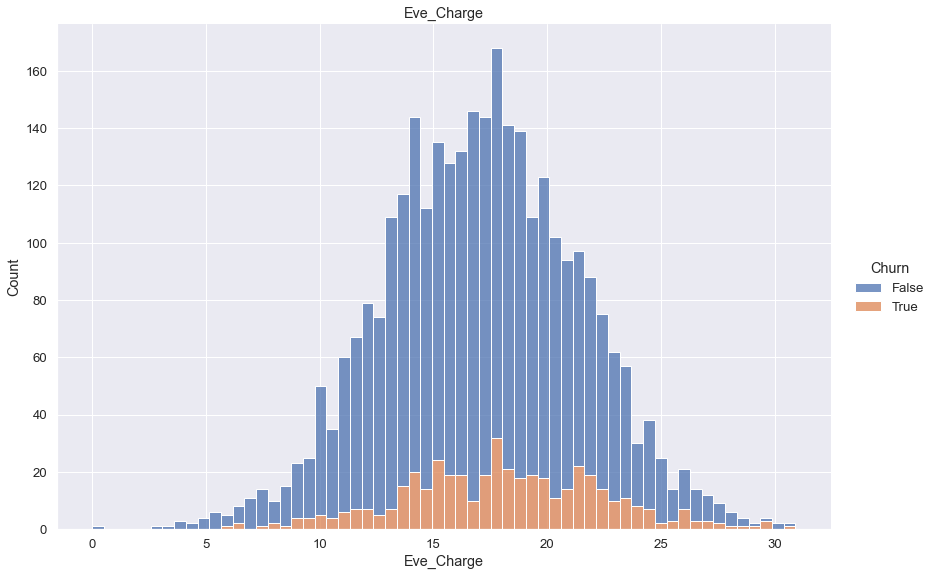

time: 844 ms (started: 2021-08-23 21:15:15 -03:00)


In [241]:
# EVENING CHARGE
sns.displot(datos_churn, x="Eve_Charge", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Eve_Charge')
plt.plot()

[]

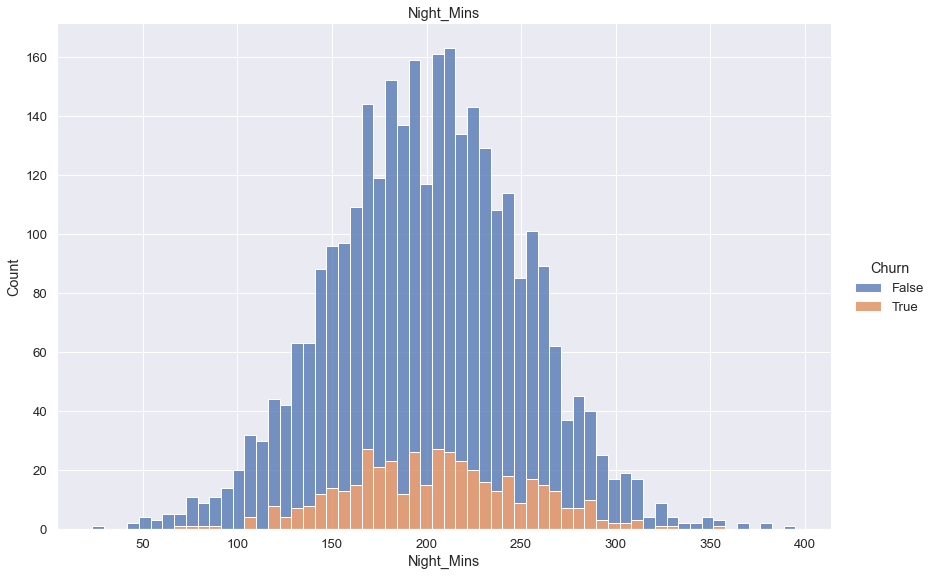

time: 812 ms (started: 2021-08-23 21:17:57 -03:00)


In [242]:
# NIGHT MINS
sns.displot(datos_churn, x="Night_Mins", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Night_Mins')
plt.plot()

In [243]:
# NIGHT CALLS
sns.displot(datos_churn, x="Night_Calls", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Night_Calls')
plt.plot()

[]

time: 828 ms (started: 2021-08-23 21:18:34 -03:00)


[]

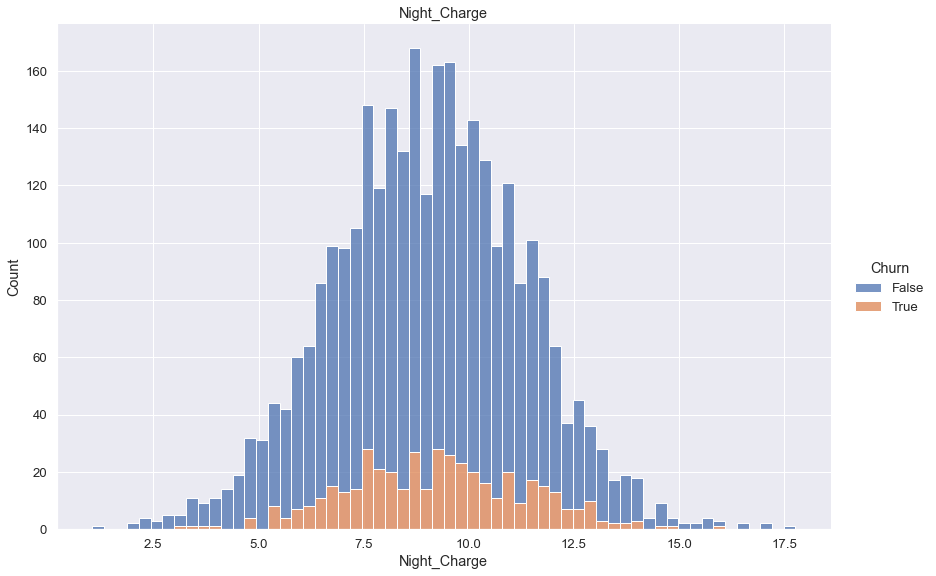

time: 891 ms (started: 2021-08-23 21:20:12 -03:00)


In [244]:
# NIGHT CHARGE
sns.displot(datos_churn, x="Night_Charge", hue= 'Churn', bins=60, height=8, aspect=1.5/1, multiple="stack")
plt.title('Night_Charge')
plt.plot()

In [259]:
# INTERNATIONAL MINS
sns.displot(datos_churn, x="Intl_Mins", hue= 'Churn', bins=30, height=8, aspect=1.5/1, multiple="stack")
plt.title('Intl_Mins')
plt.plot()

[]

time: 765 ms (started: 2021-08-23 21:25:13 -03:00)


[]

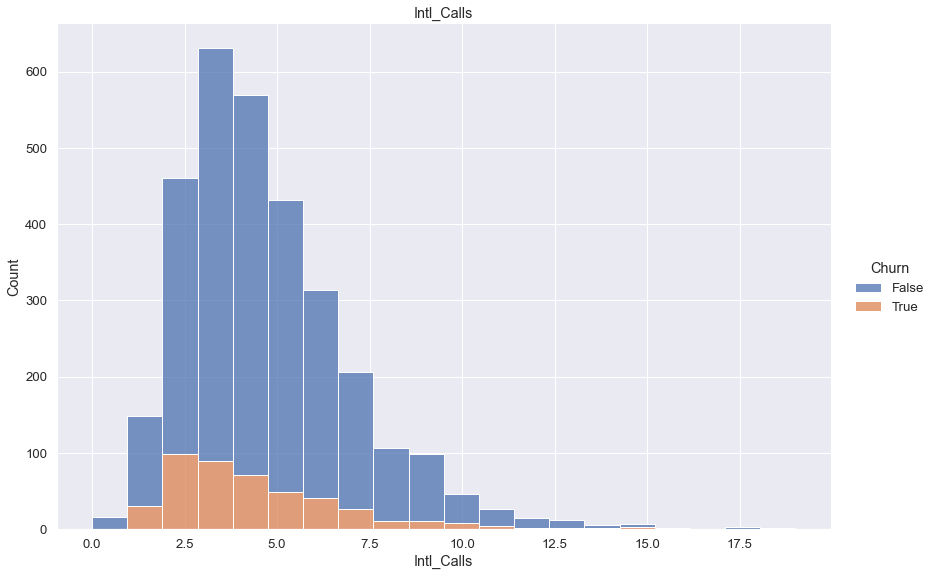

time: 656 ms (started: 2021-08-23 21:22:11 -03:00)


In [250]:
# INTERNATIONAL CALLS
sns.displot(datos_churn, x="Intl_Calls", hue= 'Churn', bins=20, height=8, aspect=1.5/1, multiple="stack")
plt.title('Intl_Calls')
plt.plot()

[]

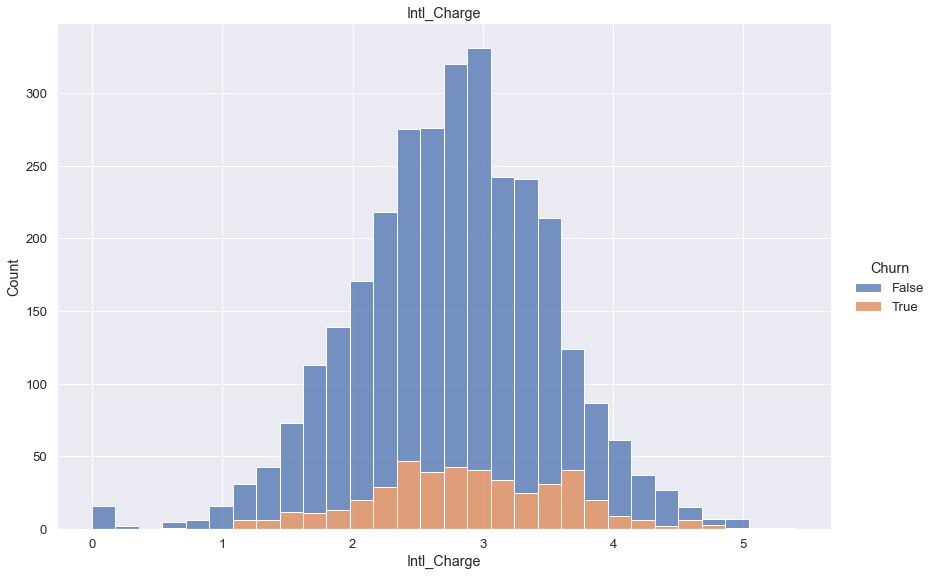

time: 687 ms (started: 2021-08-23 21:23:47 -03:00)


In [256]:
# INTERNATIONAL CHARGE
sns.displot(datos_churn, x="Intl_Charge", hue= 'Churn', bins=30, height=8, aspect=1.5/1, multiple="stack")
plt.title('Intl_Charge')
plt.plot()

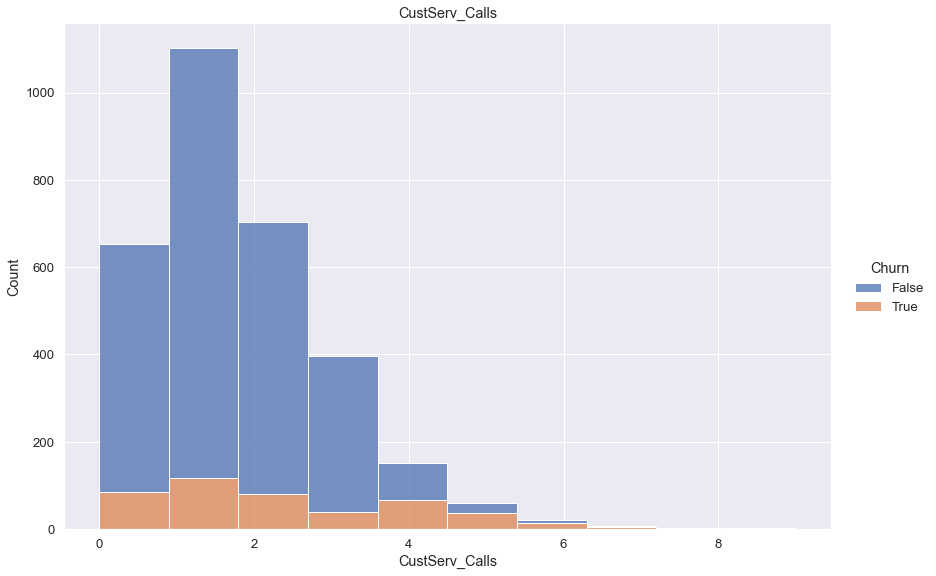

time: 531 ms (started: 2021-08-23 21:27:59 -03:00)


In [272]:
# Curstomer service calls
sns.displot(datos_churn, x="CustServ_Calls", hue= 'Churn', bins=10, height=8, aspect=1.5/1, multiple="stack")
plt.title('CustServ_Calls')
plt.show()

## Proportion Analysis

### Table of proportion Intl_plan vs Churn

In [53]:
# Table of proportion Intl_plan vs Churn
Intl_plan = pd.crosstab(index=datos_churn["Churn"], 
                           columns=datos_churn["Intl_Plan"], margins=True)

Intl_plan.columns = ["No","Yes","rowtotal"]
Intl_plan.index= ["No Churn","Churn","coltotal"]

Intl_plan

No  Yes  rowtotal
No Churn  2479  173      2652
Churn      321  126       447
coltotal  2800  299      3099

time: 63 ms (started: 2021-08-23 17:02:36 -03:00)


In [55]:
Intl_plan.div(Intl_plan["rowtotal"],axis=0)

No       Yes  rowtotal
No Churn  0.934766  0.065234       1.0
Churn     0.718121  0.281879       1.0
coltotal  0.903517  0.096483       1.0

time: 0 ns (started: 2021-08-23 17:03:14 -03:00)


___
___

In [273]:
datos_churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code'],
      dtype='object')

time: 31 ms (started: 2021-08-23 22:40:16 -03:00)


<AxesSubplot:xlabel='Churn', ylabel='Day_Calls'>

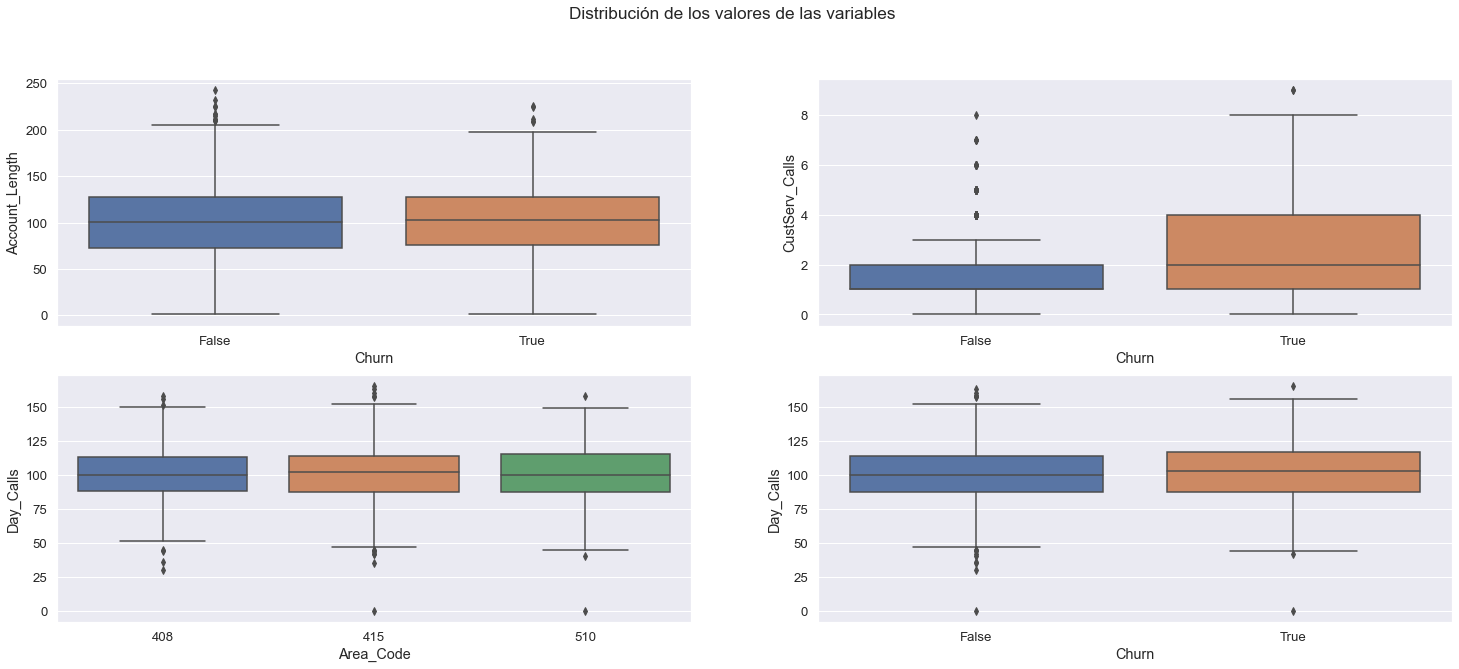

time: 703 ms (started: 2021-08-23 22:54:35 -03:00)


In [284]:
# Vizualizando la distribucion de los valores de la variable categórica: tipos de propiedad
fig, axes = plt.subplots(2, 2, figsize=(25, 10))

fig.suptitle('Distribución de los valores de las variables')

sns.boxplot(ax=axes[0, 0], data=datos_churn, y='Account_Length',x='Churn')
sns.boxplot(ax=axes[0, 1], data=datos_churn, y='CustServ_Calls', x='Churn')
sns.boxplot(ax=axes[1, 0], data=datos_churn, y='Day_Calls', x='Area_Code')
sns.boxplot(ax=axes[1, 1], data=datos_churn, y='Day_Calls' , x='Churn')
#sns.boxplot(ax=axes[1, 1], data=train_data, y='car_insurance', x='balance_amt')
#sns.boxplot(ax=axes[1, 2], data=train_data, x='property_type' , y='price')

### Table of proportion Vmail_plan vs Churn

In [59]:
# Table of proportion Vmail_plan vs Churn
Vmail_Plan = pd.crosstab(index=datos_churn["Churn"], 
                           columns=datos_churn["Vmail_Plan"], margins=True)

Vmail_Plan.columns = ["No","Yes","rowtotal"]
Vmail_Plan.index= ["No Churn","Churn","coltotal"]

Vmail_Plan

No  Yes  rowtotal
No Churn  1873  779      2652
Churn      371   76       447
coltotal  2244  855      3099

time: 31 ms (started: 2021-08-23 17:04:04 -03:00)


In [60]:
Vmail_Plan.div(Vmail_Plan["rowtotal"],axis=0)

No       Yes  rowtotal
No Churn  0.706259  0.293741       1.0
Churn     0.829978  0.170022       1.0
coltotal  0.724105  0.275895       1.0

time: 0 ns (started: 2021-08-23 17:04:06 -03:00)


___
___

### Table of proportion Area_Code vs Churn

In [62]:
# Table of proportion Area_Code vs Churn
Area_Code = pd.crosstab(index=datos_churn["Churn"], 
                           columns=datos_churn["Area_Code"], margins=True)

Area_Code.columns = ["Area 408","Area 415","Area 510","rowtotal"]
Area_Code.index= ["No Churn","Churn","coltotal"]

Area_Code

Area 408  Area 415  Area 510  rowtotal
No Churn       659      1327       666      2652
Churn          116       216       115       447
coltotal       775      1543       781      3099

time: 62 ms (started: 2021-08-23 17:04:23 -03:00)


In [63]:
Area_Code.div(Area_Code["rowtotal"],axis=0)

Area 408  Area 415  Area 510  rowtotal
No Churn  0.248492  0.500377  0.251131       1.0
Churn     0.259508  0.483221  0.257271       1.0
coltotal  0.250081  0.497903  0.252017       1.0

time: 16 ms (started: 2021-08-23 17:04:27 -03:00)


___
___

### Table of proportion State_Code vs Churn

In [64]:
# Table of proportion Area_Code vs Churn
State = pd.crosstab(index=datos_churn["Churn"], 
                           columns=datos_churn["State"], margins=True)

State.columns = ['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND',"rowtotal"]
State.index= ["No Churn","Churn","coltotal"]

pd.set_option("display.max_rows", 20, "display.max_columns", None)

State

KS  OH  NJ  OK  AL  MA  MO  LA  WV  IN  RI  IA  MT  NY  ID  VT  VA  \
No Churn  46  68  41  53  24  57  55  45  46  55  44  49  39  60  50  55  53   
Churn      2   8   6   4   8   9  11   5   9   8   7   2   2   6   4   7  12   
coltotal  48  76  47  57  32  66  66  50  55  63  51  51  41  66  54  62  65   

          TX  FL  CO  AZ  SC  NE  WY  HI  IL  NH  GA  AK  MD  AR  WI  OR  MI  \
No Churn  49  42  49  51  46  54  67  52  49  53  51  52  55  43  46  52  51   
Churn      8   4  11  15  11  15  15   7  13  13   9   6   5   8  18   6  14   
coltotal  57  46  60  66  57  69  82  59  62  66  60  58  60  51  64  58  65   

          DE  UT  CA  MN  SD  NC  WA  NM  NV  DC  KY  ME  MS  TN  PA  CT  ND  \
No Churn  60  63  44  60  34  55  38  46  43  54  58  71  61  49  63  86  65   
Churn     15   9   8  11   8   5  14   8   5  17  10   5   8  10   7  10   9   
coltotal  75  72  52  71  42  60  52  54  48  71  68  76  69  59  70  96  74   

          rowtotal  
No Churn      2652  
Churn          447  
coltotal      3099

time: 78 ms (started: 2021-08-23 17:04:38 -03:00)


In [65]:
State.div(State["rowtotal"],axis=0,)

KS        OH        NJ        OK        AL        MA  \
No Churn  0.017345  0.025641  0.015460  0.019985  0.009050  0.021493   
Churn     0.004474  0.017897  0.013423  0.008949  0.017897  0.020134   
coltotal  0.015489  0.024524  0.015166  0.018393  0.010326  0.021297   

                MO        LA        WV        IN        RI        IA  \
No Churn  0.020739  0.016968  0.017345  0.020739  0.016591  0.018477   
Churn     0.024609  0.011186  0.020134  0.017897  0.015660  0.004474   
coltotal  0.021297  0.016134  0.017748  0.020329  0.016457  0.016457   

                MT        NY        ID        VT        VA        TX  \
No Churn  0.014706  0.022624  0.018854  0.020739  0.019985  0.018477   
Churn     0.004474  0.013423  0.008949  0.015660  0.026846  0.017897   
coltotal  0.013230  0.021297  0.017425  0.020006  0.020975  0.018393   

                FL        CO        AZ        SC        NE        WY  \
No Churn  0.015837  0.018477  0.019231  0.017345  0.020362  0.025264   
Churn     0.008949  0.024609  0.033557  0.024609  0.033557  0.033557   
coltotal  0.014843  0.019361  0.021297  0.018393  0.022265  0.026460   

                HI        IL        NH        GA        AK        MD  \
No Churn  0.019608  0.018477  0.019985  0.019231  0.019608  0.020739   
Churn     0.015660  0.029083  0.029083  0.020134  0.013423  0.011186   
coltotal  0.019038  0.020006  0.021297  0.019361  0.018716  0.019361   

                AR        WI        OR        MI        DE        UT  \
No Churn  0.016214  0.017345  0.019608  0.019231  0.022624  0.023756   
Churn     0.017897  0.040268  0.013423  0.031320  0.033557  0.020134   
coltotal  0.016457  0.020652  0.018716  0.020975  0.024201  0.023233   

                CA        MN        SD        NC        WA        NM  \
No Churn  0.016591  0.022624  0.012821  0.020739  0.014329  0.017345   
Churn     0.017897  0.024609  0.017897  0.011186  0.031320  0.017897   
coltotal  0.016780  0.022911  0.013553  0.019361  0.016780  0.017425   

                NV        DC        KY        ME        MS        TN  \
No Churn  0.016214  0.020362  0.021870  0.026772  0.023002  0.018477   
Churn     0.011186  0.038031  0.022371  0.011186  0.017897  0.022371   
coltotal  0.015489  0.022911  0.021943  0.024524  0.022265  0.019038   

                PA        CT        ND  rowtotal  
No Churn  0.023756  0.032428  0.024510       1.0  
Churn     0.015660  0.022371  0.020134       1.0  
coltotal  0.022588  0.030978  0.023879       1.0

time: 47 ms (started: 2021-08-23 17:04:42 -03:00)


___
___

In [66]:
datos_churn

State  Account_Length  Area_Code     Phone Intl_Plan Vmail_Plan  \
0       KS             128        415  382-4657        no        yes   
1       OH             107        415  371-7191        no        yes   
2       NJ             137        415  358-1921        no         no   
3       OH              84        408  375-9999       yes         no   
4       OK              75        415  330-6626       yes         no   
...    ...             ...        ...       ...       ...        ...   
3094    MN              91        415  382-9297        no         no   
3095    AL             181        415  330-9294        no        yes   
3096    CO             118        415  362-8763        no        yes   
3097    ME             112        415  403-4816        no         no   
3098    GA              93        415  371-2155        no         no   

      Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0                25     265.1        110       45.07     197.4         99   
1                26     161.6        123       27.47     195.5        103   
2                 0     243.4        114       41.38     121.2        110   
3                 0     299.4         71       50.90      61.9         88   
4                 0     166.7        113       28.34     148.3        122   
...             ...       ...        ...         ...       ...        ...   
3094              0     133.8         61       22.75     158.8         96   
3095             27     190.3         93       32.35     249.0        127   
3096             36     294.9        106       50.13     165.7        115   
3097              0     185.4        114       31.52     191.4        119   
3098              0     179.5        121       30.52     191.9        131   

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  Intl_Mins  \
0          16.78       244.7           91         11.01       10.0   
1          16.62       254.4          103         11.45       13.7   
2          10.30       162.6          104          7.32       12.2   
3           5.26       196.9           89          8.86        6.6   
4          12.61       186.9          121          8.41       10.1   
...          ...         ...          ...           ...        ...   
3094       13.50       189.6           92          8.53       10.5   
3095       21.17       215.7           82          9.71       10.6   
3096       14.08       189.2           63          8.51        9.8   
3097       16.27       144.0           78          6.48       10.0   
3098       16.31       165.5          125          7.45       12.0   

      Intl_Calls  Intl_Charge  CustServ_Calls  Churn  Churn_code  
0              3         2.70               1  False           0  
1              3         3.70               1  False           0  
2              5         3.29               0  False           0  
3              7         1.78               2  False           0  
4              3         2.73               3  False           0  
...          ...          ...             ...    ...         ...  
3094           2         2.84               1  False           0  
3095           4         2.86               1  False           0  
3096           5         2.65               3  False           0  
3097          11         2.70               2  False           0  
3098           4         3.24               0  False           0  

[3099 rows x 22 columns]

time: 47 ms (started: 2021-08-23 17:04:47 -03:00)


## Análisis de correlación de variables

### Correlación a pares (Pairplot)

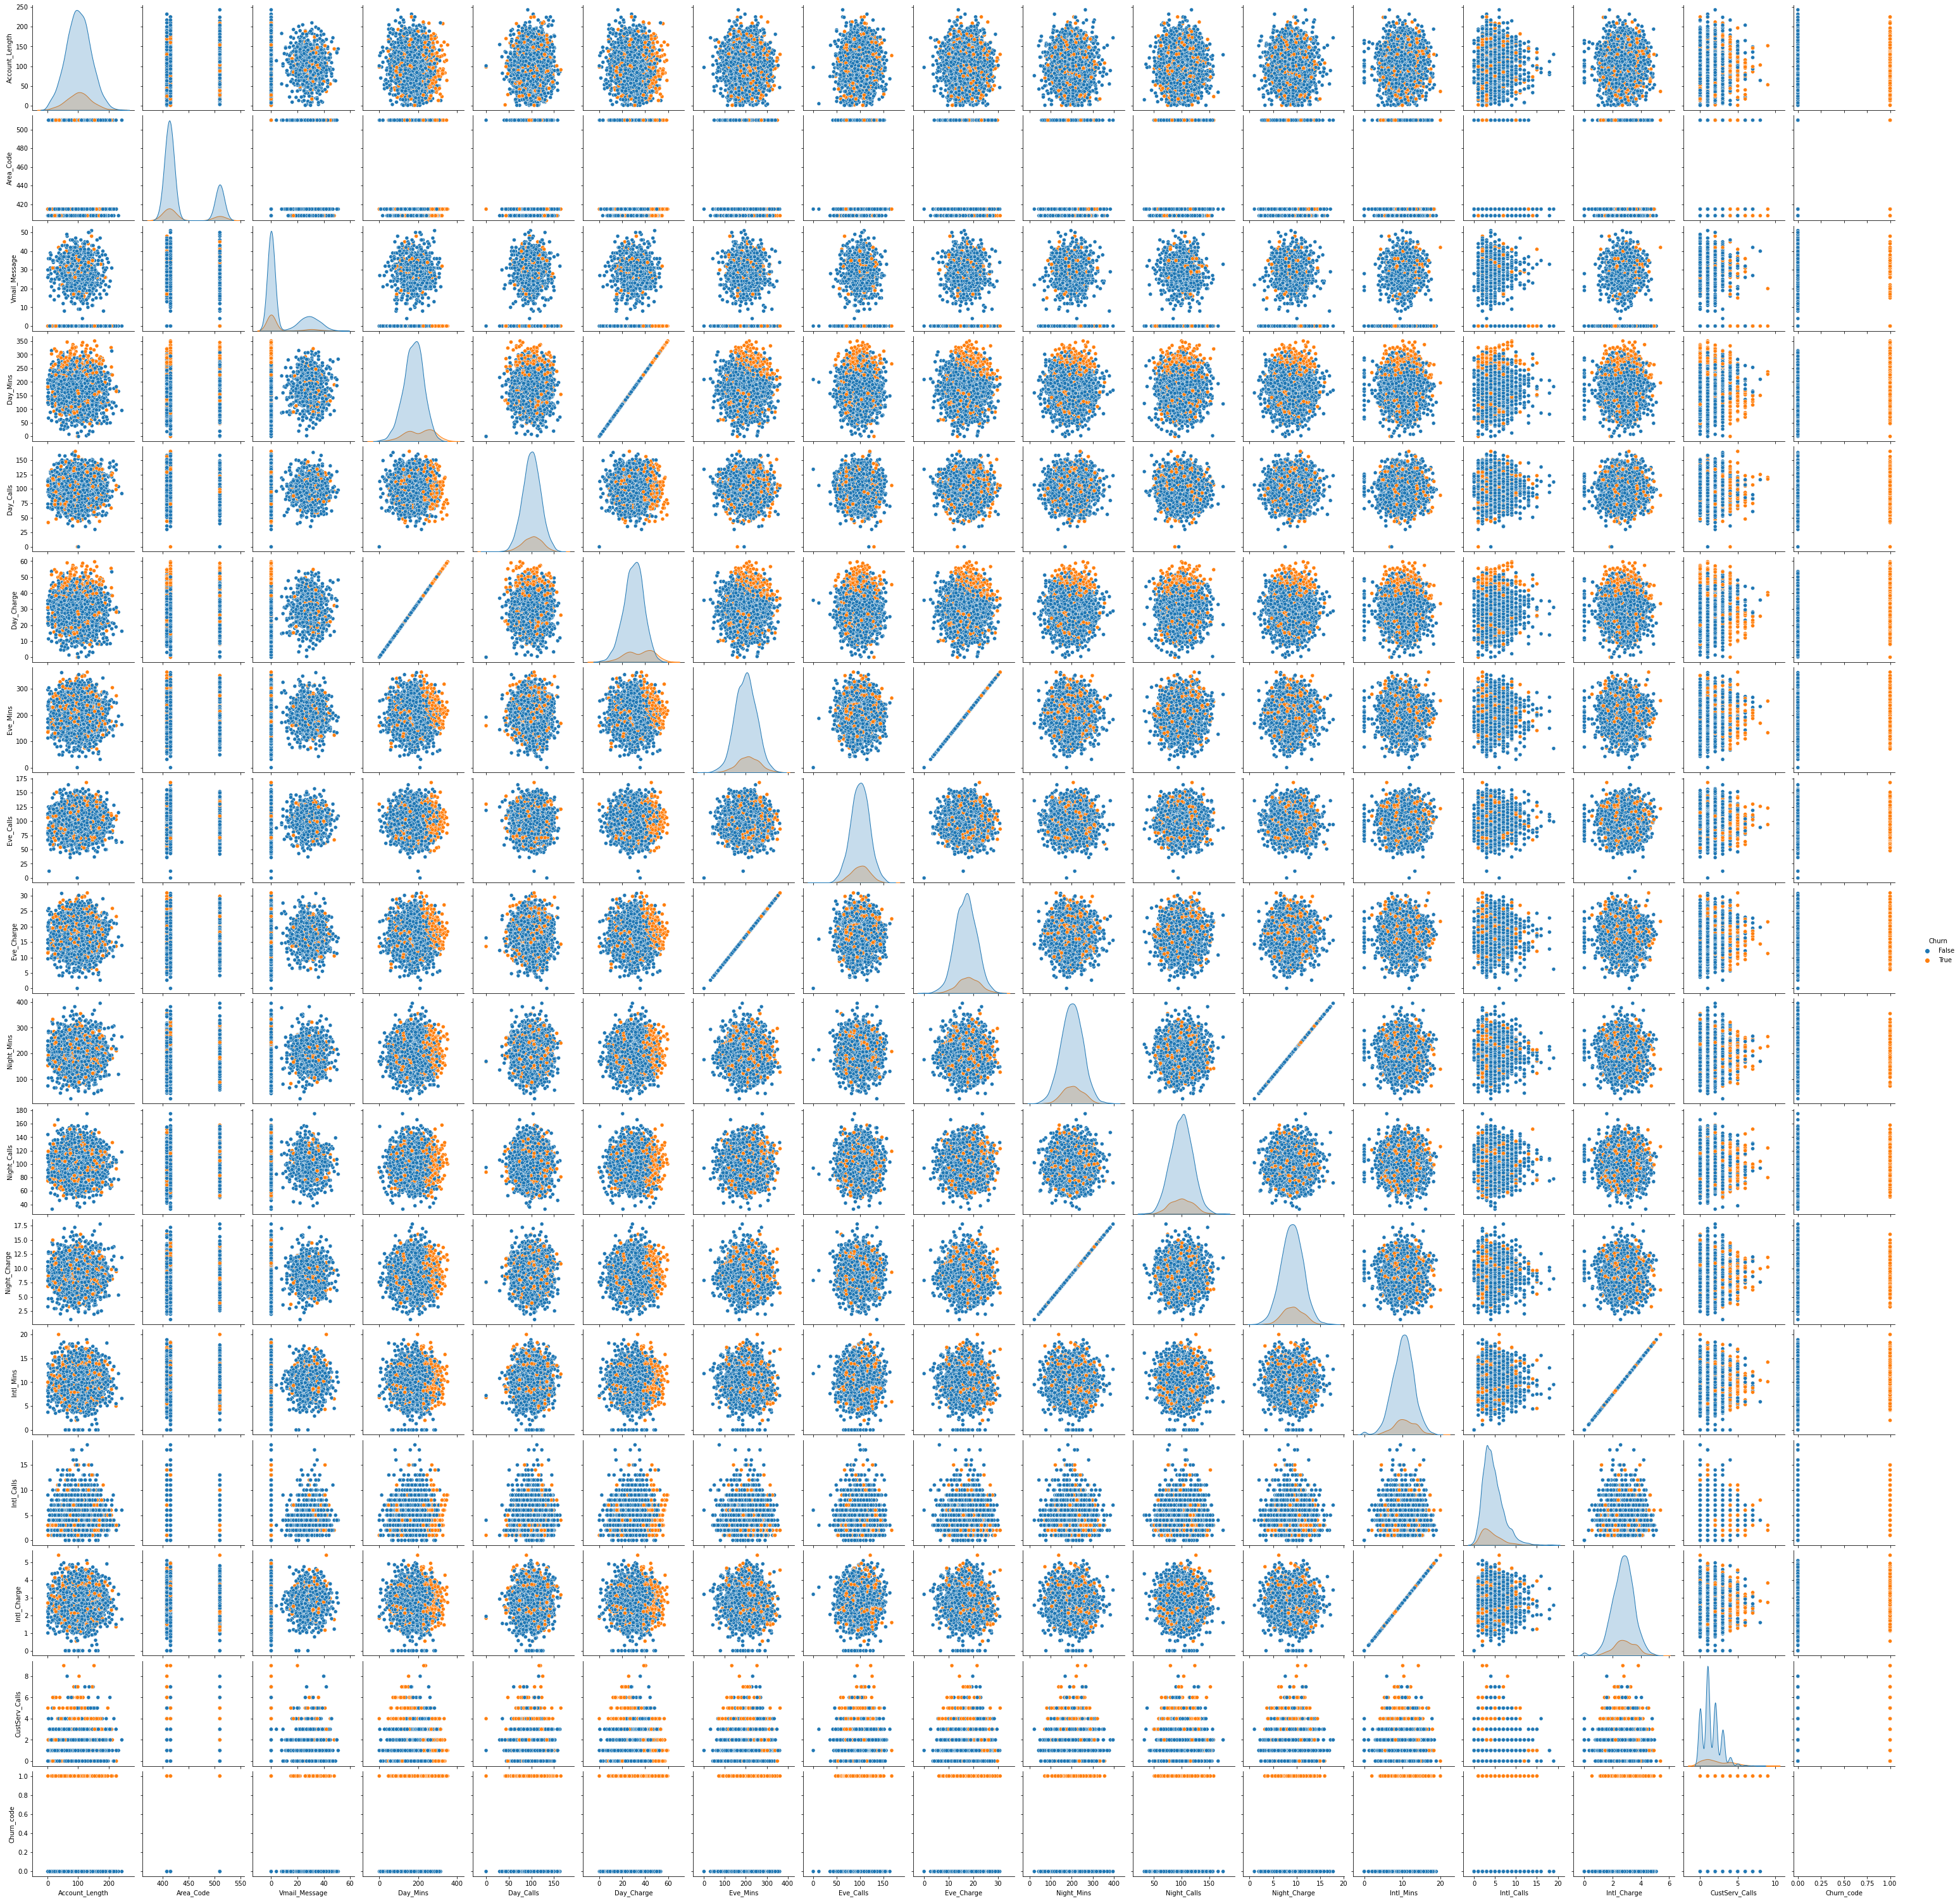

time: 2min 32s (started: 2021-08-23 17:05:20 -03:00)


In [67]:
pares= datos_churn[[ 'Account_Length', 'Area_Code', 
       'Vmail_Message', 
       'Day_Mins', 'Day_Calls', 'Day_Charge', 
       'Eve_Mins','Eve_Calls', 'Eve_Charge', 
       'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls',
       'Churn','Churn_code']]
sns.pairplot(pares, hue='Churn')
plt.show()

### Matriz de correlación 

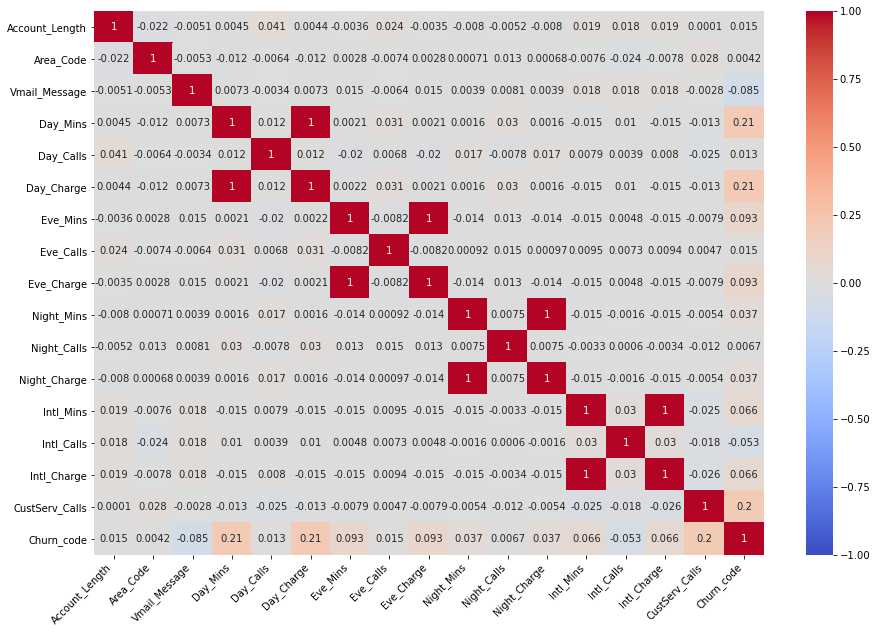

time: 4.34 s (started: 2021-08-23 17:08:42 -03:00)


In [69]:
# Consultamos la matriz de correlación
plt.figure(figsize = (15,10))

matriz= datos_churn[[ 'Account_Length', 'Area_Code', 
       'Vmail_Message', 
       'Day_Mins', 'Day_Calls', 'Day_Charge', 
       'Eve_Mins','Eve_Calls', 'Eve_Charge', 
       'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls',
        'Churn_code']]
corrMatrix = matriz.corr()
ax= sns.heatmap(corrMatrix,annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#plt.show()

In [70]:
datos_churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code'],
      dtype='object')

time: 16 ms (started: 2021-08-23 17:09:38 -03:00)


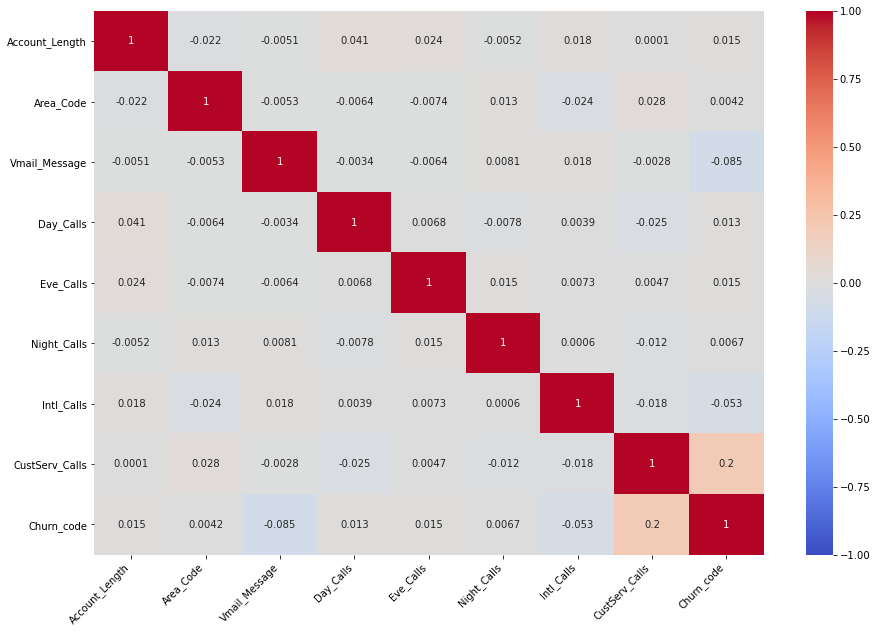

time: 1.62 s (started: 2021-08-23 17:13:18 -03:00)


In [73]:
# Consultamos la matriz de correlación
plt.figure(figsize = (15,10))

matriz2= datos_churn[[ 'State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 
         'Day_Calls', 
       'Eve_Calls', 
         'Night_Calls',
         'Intl_Calls', 
       'CustServ_Calls', 'Churn_code']]
corrMatrix2 = matriz2.corr()
ax= sns.heatmap(corrMatrix2,annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#plt.show()

In [74]:
datos_churn

State  Account_Length  Area_Code     Phone Intl_Plan Vmail_Plan  \
0       KS             128        415  382-4657        no        yes   
1       OH             107        415  371-7191        no        yes   
2       NJ             137        415  358-1921        no         no   
3       OH              84        408  375-9999       yes         no   
4       OK              75        415  330-6626       yes         no   
...    ...             ...        ...       ...       ...        ...   
3094    MN              91        415  382-9297        no         no   
3095    AL             181        415  330-9294        no        yes   
3096    CO             118        415  362-8763        no        yes   
3097    ME             112        415  403-4816        no         no   
3098    GA              93        415  371-2155        no         no   

      Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0                25     265.1        110       45.07     197.4         99   
1                26     161.6        123       27.47     195.5        103   
2                 0     243.4        114       41.38     121.2        110   
3                 0     299.4         71       50.90      61.9         88   
4                 0     166.7        113       28.34     148.3        122   
...             ...       ...        ...         ...       ...        ...   
3094              0     133.8         61       22.75     158.8         96   
3095             27     190.3         93       32.35     249.0        127   
3096             36     294.9        106       50.13     165.7        115   
3097              0     185.4        114       31.52     191.4        119   
3098              0     179.5        121       30.52     191.9        131   

      Eve_Charge  Night_Mins  Night_Calls  Night_Charge  Intl_Mins  \
0          16.78       244.7           91         11.01       10.0   
1          16.62       254.4          103         11.45       13.7   
2          10.30       162.6          104          7.32       12.2   
3           5.26       196.9           89          8.86        6.6   
4          12.61       186.9          121          8.41       10.1   
...          ...         ...          ...           ...        ...   
3094       13.50       189.6           92          8.53       10.5   
3095       21.17       215.7           82          9.71       10.6   
3096       14.08       189.2           63          8.51        9.8   
3097       16.27       144.0           78          6.48       10.0   
3098       16.31       165.5          125          7.45       12.0   

      Intl_Calls  Intl_Charge  CustServ_Calls  Churn  Churn_code  
0              3         2.70               1  False           0  
1              3         3.70               1  False           0  
2              5         3.29               0  False           0  
3              7         1.78               2  False           0  
4              3         2.73               3  False           0  
...          ...          ...             ...    ...         ...  
3094           2         2.84               1  False           0  
3095           4         2.86               1  False           0  
3096           5         2.65               3  False           0  
3097          11         2.70               2  False           0  
3098           4         3.24               0  False           0  

[3099 rows x 22 columns]

time: 31 ms (started: 2021-08-23 17:13:39 -03:00)


In [75]:
datos_churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code'],
      dtype='object')

time: 0 ns (started: 2021-08-23 17:13:46 -03:00)


## Variables encoding

In [176]:
# Aplicamos el método get_dummies de Pandas para obtener variables binarias de cada categoría de las columnas 'l3' y 'property_type'
datos_churn_encod = pd.get_dummies(datos_churn, columns=['State','Area_Code',"Intl_Plan", "Vmail_Plan"] )
#datos_proper_SPR02_Encod.drop(['l3','property_type'], axis=1)
datos_churn_encod

Account_Length     Phone  Vmail_Message  Day_Mins  Day_Calls  \
0                128  382-4657             25     265.1        110   
1                107  371-7191             26     161.6        123   
2                137  358-1921              0     243.4        114   
3                 84  375-9999              0     299.4         71   
4                 75  330-6626              0     166.7        113   
...              ...       ...            ...       ...        ...   
3094              91  382-9297              0     133.8         61   
3095             181  330-9294             27     190.3         93   
3096             118  362-8763             36     294.9        106   
3097             112  403-4816              0     185.4        114   
3098              93  371-2155              0     179.5        121   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
3094       22.75     158.8         96       13.50       189.6           92   
3095       32.35     249.0        127       21.17       215.7           82   
3096       50.13     165.7        115       14.08       189.2           63   
3097       31.52     191.4        119       16.27       144.0           78   
3098       30.52     191.9        131       16.31       165.5          125   

      Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  \
0            11.01       10.0           3         2.70               1  False   
1            11.45       13.7           3         3.70               1  False   
2             7.32       12.2           5         3.29               0  False   
3             8.86        6.6           7         1.78               2  False   
4             8.41       10.1           3         2.73               3  False   
...            ...        ...         ...          ...             ...    ...   
3094          8.53       10.5           2         2.84               1  False   
3095          9.71       10.6           4         2.86               1  False   
3096          8.51        9.8           5         2.65               3  False   
3097          6.48       10.0          11         2.70               2  False   
3098          7.45       12.0           4         3.24               0  False   

      Churn_code  State_AK  State_AL  State_AR  State_AZ  State_CA  State_CO  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
3094           0         0         0         0         0         0         0   
3095           0         0         1         0         0         0         0   
3096           0         0         0         0         0         0         1   
3097           0         0         0         0         0         0         0   
3098           0         0         0         0         0         0         0   

      State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  State_IA  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0      

time: 172 ms (started: 2021-08-23 20:18:58 -03:00)


In [177]:
datos_churn_encod.columns

Index(['Account_Length', 'Phone', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY', 'Area_Code_408', 'Area_Code_415', 'Area_Code_51

time: 16 ms (started: 2021-08-23 20:19:01 -03:00)


In [178]:
# Elegimos las variables relevantes
datos_churn_f2= datos_churn_encod.copy()

datos_churn_f2

Account_Length     Phone  Vmail_Message  Day_Mins  Day_Calls  \
0                128  382-4657             25     265.1        110   
1                107  371-7191             26     161.6        123   
2                137  358-1921              0     243.4        114   
3                 84  375-9999              0     299.4         71   
4                 75  330-6626              0     166.7        113   
...              ...       ...            ...       ...        ...   
3094              91  382-9297              0     133.8         61   
3095             181  330-9294             27     190.3         93   
3096             118  362-8763             36     294.9        106   
3097             112  403-4816              0     185.4        114   
3098              93  371-2155              0     179.5        121   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
3094       22.75     158.8         96       13.50       189.6           92   
3095       32.35     249.0        127       21.17       215.7           82   
3096       50.13     165.7        115       14.08       189.2           63   
3097       31.52     191.4        119       16.27       144.0           78   
3098       30.52     191.9        131       16.31       165.5          125   

      Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  Churn  \
0            11.01       10.0           3         2.70               1  False   
1            11.45       13.7           3         3.70               1  False   
2             7.32       12.2           5         3.29               0  False   
3             8.86        6.6           7         1.78               2  False   
4             8.41       10.1           3         2.73               3  False   
...            ...        ...         ...          ...             ...    ...   
3094          8.53       10.5           2         2.84               1  False   
3095          9.71       10.6           4         2.86               1  False   
3096          8.51        9.8           5         2.65               3  False   
3097          6.48       10.0          11         2.70               2  False   
3098          7.45       12.0           4         3.24               0  False   

      Churn_code  State_AK  State_AL  State_AR  State_AZ  State_CA  State_CO  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
3094           0         0         0         0         0         0         0   
3095           0         0         1         0         0         0         0   
3096           0         0         0         0         0         0         1   
3097           0         0         0         0         0         0         0   
3098           0         0         0         0         0         0         0   

      State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  State_IA  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0      

time: 78 ms (started: 2021-08-23 20:19:08 -03:00)


In [179]:
datos_churn_f2.columns

Index(['Account_Length', 'Phone', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn', 'Churn_code', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY', 'Area_Code_408', 'Area_Code_415', 'Area_Code_51

time: 15 ms (started: 2021-08-23 20:19:13 -03:00)


In [181]:
datos_modelo= datos_churn_f2.copy()
datos_modelo.drop(['Phone','Churn', 'Phone', 'Vmail_Message', 
        'Day_Mins', 'Day_Charge',
       'Eve_Mins', 'Eve_Charge',
        'Night_Mins', 'Night_Charge'], axis=1, inplace=True)
datos_modelo.columns

Index(['Account_Length', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn_code', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Area_Code_408', 'Area_Code_415',
       'Area_Code_510', 'Intl_Plan_no', 'Intl_Plan_yes', 'Vmail_Plan_no',
       'Vmail_Plan_yes'],
      dtype='object')

time: 47 ms (started: 2021-08-23 20:19:40 -03:00)


In [187]:
#Definición de variables predictoras (X) y variable target (y). 

X = datos_modelo.drop(['Churn_code'], axis= 1)

y = datos_modelo['Churn_code']

time: 16 ms (started: 2021-08-23 20:20:22 -03:00)


In [188]:
X.columns

Index(['Account_Length', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Mins',
       'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY', 'Area_Code_408', 'Area_Code_415', 'Area_Code_510',
       'Intl_Plan_no', 'Intl_Plan_yes', 'Vmail_Plan_no', 'Vmail_Plan_yes'],
      dtype='object')

time: 0 ns (started: 2021-08-23 20:20:25 -03:00)


## Train/Test Split

In [189]:
#Importamos las librerias correspondientes
from sklearn.linear_model import LinearRegression #Regresor de Linear Regression
from sklearn.neighbors import KNeighborsRegressor #Regresor de KNN
from sklearn.tree import DecisionTreeRegressor #Regresor de Decision Trees
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.metrics import accuracy_score 

time: 0 ns (started: 2021-08-23 20:20:26 -03:00)


### Datos no balanceados

In [190]:
#Se hace la partición entrenamiento/prueba (train/test split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

time: 16 ms (started: 2021-08-23 20:20:29 -03:00)


In [195]:
# Verificamos los datos entrenamiento/prueba de X:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
# Verificamos los datos de entrenamiento/prueba de y:
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2169, 66)
X_test (930, 66)
y_train (2169,)
y_test (930,)
time: 15 ms (started: 2021-08-23 20:21:27 -03:00)


### Datos balanceados

In [196]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smt.fit_resample(X, y)

time: 63 ms (started: 2021-08-23 20:21:28 -03:00)


In [197]:
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.3, random_state=42)

time: 16 ms (started: 2021-08-23 20:21:29 -03:00)


In [198]:
# Verificamos los datos entrenamiento/prueba de X:
print('X_train_SMOTE', X_train_SMOTE.shape)
print('X_test_SMOTE', X_test_SMOTE.shape)
# Verificamos los datos de entrenamiento/prueba de y:
print('y_train_SMOTE', y_train_SMOTE.shape)
print('y_test_SMOTE', y_test_SMOTE.shape)

X_train_SMOTE (3712, 66)
X_test_SMOTE (1592, 66)
y_train_SMOTE (3712,)
y_test_SMOTE (1592,)
time: 0 ns (started: 2021-08-23 20:21:29 -03:00)


## Models

In [199]:
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectFromModel

time: 0 ns (started: 2021-08-23 20:21:32 -03:00)


### Batch test

In [200]:
def compare_classifiers(X, Y):
    
    import warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score


    classifiers = [
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        MLPClassifier(),
        LogisticRegression()]

    list_results = []
    kfold = KFold(n_splits=30)
        
    for classifier in classifiers:
        name = classifier.__class__.__name__
        classifier.fit(X, Y)

        # It's useless to calculate the score on the training set (for eg. the Decision Tree will always have score 100)
        train_score = round(classifier.score(X, Y) * 100, 2)

        # Calcuate a cross-validation score
        cv_score = cross_val_score(classifier, X, Y, cv=kfold, scoring='accuracy')

        # Append the results to a list
        list_results.append({'Classifier': name, 
                             'Train_score': train_score, 
                             'CV_score': round(cv_score.mean() * 100, 2)})

    results = pd.DataFrame(list_results, columns=['Classifier', 
                                                  'Train_score', 
                                                  'CV_score']).sort_values(by='CV_score', ascending=False)
    return results

time: 0 ns (started: 2021-08-23 20:21:35 -03:00)


In [201]:
# Classifiers performance ranking
results_dumb = compare_classifiers(X_train_SMOTE, y_train_SMOTE)
df_results_dumb= pd.DataFrame(data=results_dumb)
df_results_dumb

Classifier  Train_score  CV_score
3          RandomForestClassifier       100.00     92.03
7      LinearDiscriminantAnalysis        91.08     91.08
9                   MLPClassifier        92.91     90.49
6                      GaussianNB        90.30     89.92
5      GradientBoostingClassifier        89.74     88.12
8   QuadraticDiscriminantAnalysis        86.37     87.85
2          DecisionTreeClassifier       100.00     86.83
4              AdaBoostClassifier        87.45     86.53
10             LogisticRegression        82.30     84.32
0            KNeighborsClassifier        84.91     76.26
1                             SVC        54.80     53.56

time: 8min 1s (started: 2021-08-23 20:21:37 -03:00)


## Entrenamos modelos de árboles con datos escalados (no balanceados)

In [97]:
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score

time: 0 ns (started: 2021-08-23 17:20:49 -03:00)


## Decision Tree Model 1/3:

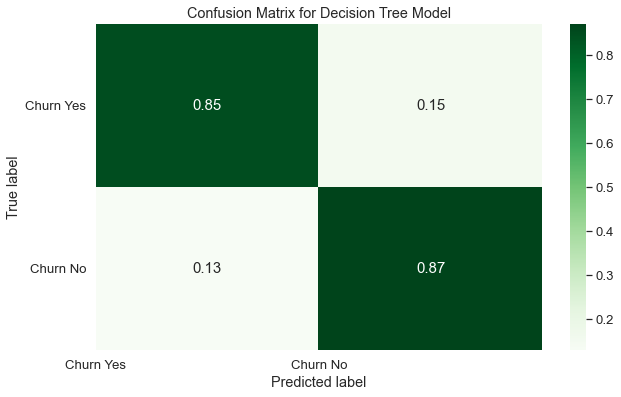

time: 344 ms (started: 2021-08-24 00:05:14 -03:00)


In [286]:
# Definir modelo Arbol de decision(Datos escalados) max_depth=None
model_decisionTree = DecisionTreeClassifier(random_state= 42)
model_decisionTree # Visualizar los parametros del modelo definido

#Se entrena el modelo con valores de entrenamiento
model_decisionTree.fit(X_train_SMOTE, y_train_SMOTE)

#Se predicen los valores (churn) con los datos de prueba escalados que el modelo no ha visto
y_pred_decisionTree = model_decisionTree.predict(X_test_SMOTE)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_SMOTE, y_pred_decisionTree)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn Yes', 'Churn No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [203]:
#RESULTADOS DECISION TREE 
#Se visualizan los resultados a traves de un reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test_SMOTE, y_pred_decisionTree))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       811
           1       0.85      0.87      0.86       781

    accuracy                           0.86      1592
   macro avg       0.86      0.86      0.86      1592
weighted avg       0.86      0.86      0.86      1592

time: 32 ms (started: 2021-08-23 20:46:49 -03:00)


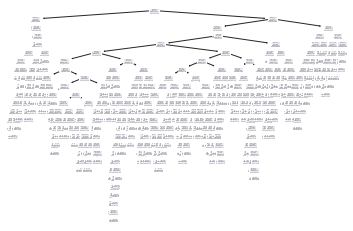

time: 32.6 s (started: 2021-08-23 20:46:56 -03:00)


In [204]:
from sklearn import tree
tree.plot_tree(model_decisionTree, proportion= True);

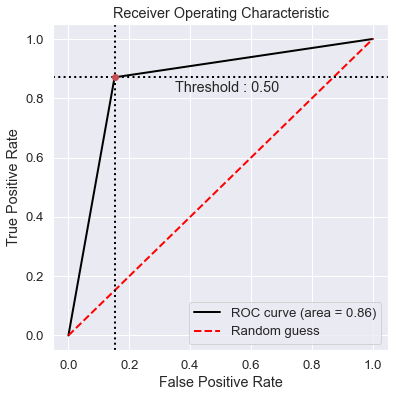

time: 375 ms (started: 2021-08-23 20:47:29 -03:00)


In [205]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test_SMOTE, y_pred_decisionTree, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(6,6))
bc.plot_roc_curve()
plt.show()

___
___

### Grid Search CV Optimization

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

time: 0 ns (started: 2021-08-23 20:47:54 -03:00)


In [207]:
dtree_grid_search(X_train_SMOTE,y_train_SMOTE,10)

{'criterion': 'entropy', 'max_depth': 9}

time: 6.73 s (started: 2021-08-23 20:47:55 -03:00)


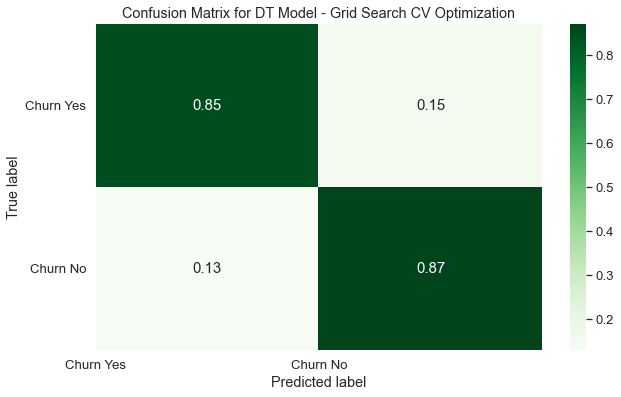

time: 344 ms (started: 2021-08-23 20:51:21 -03:00)


In [218]:
# Definir modelo Arbol de decision (Datos escalados) max_depth= 9
model_decisionTree_opt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, random_state= 42)

#Se entrena el modelo con valores de entrenamiento
model_decisionTree_opt.fit(X_train_SMOTE, y_train_SMOTE)

#Se predicen los valores (facies) con los datos de prueba no escalados que el modelo no ha visto
y_pred_decisionTree_opt = model_decisionTree.predict(X_test_SMOTE)

# Get and reshape confusion matrix data
matrix2 = confusion_matrix(y_test_SMOTE, y_pred_decisionTree_opt)
matrix2 = matrix2.astype('float') / matrix2.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix2, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn Yes', 'Churn No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for DT Model - Grid Search CV Optimization')
plt.show()

In [211]:
#RESULTADOS DECISION TREE (Datos No escalados)
#Se visualizan los resultados a traves de un reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test_SMOTE, y_pred_decisionTree_opt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       811
           1       0.85      0.87      0.86       781

    accuracy                           0.86      1592
   macro avg       0.86      0.86      0.86      1592
weighted avg       0.86      0.86      0.86      1592

time: 15 ms (started: 2021-08-23 20:48:32 -03:00)


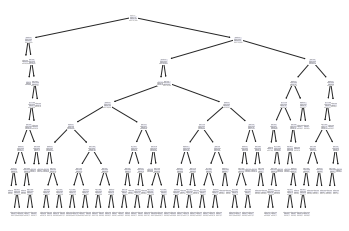

time: 7.89 s (started: 2021-08-23 20:48:58 -03:00)


In [212]:
from sklearn import tree
tree.plot_tree(model_decisionTree_opt);

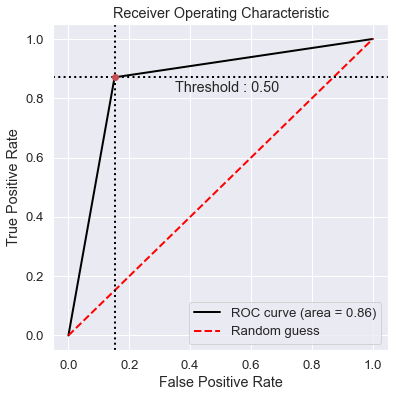

time: 344 ms (started: 2021-08-23 20:49:06 -03:00)


In [213]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test_SMOTE, y_pred_decisionTree_opt, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(6,6))
bc.plot_roc_curve()
plt.show()

___
___

## Random Forest Model 2/3:

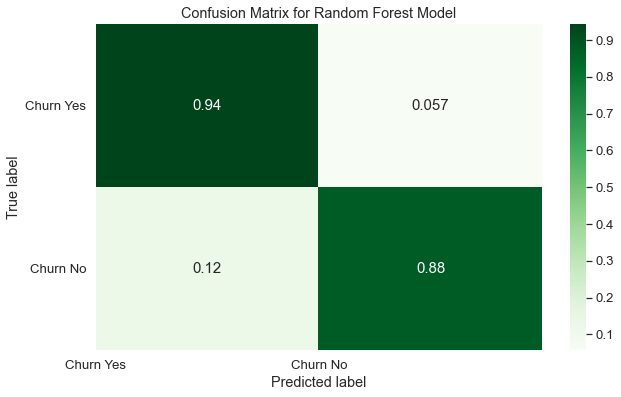

time: 1.01 s (started: 2021-08-23 20:50:49 -03:00)


In [216]:
# Defining Random Forest model
randomForest = RandomForestClassifier(random_state=42)

# Training Random Forest model
randomForest.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions for the test dataset
y_pred_RF_test = randomForest.predict(X_test_SMOTE)

# Get and reshape confusion matrix data
matrix3 = confusion_matrix(y_test_SMOTE, y_pred_RF_test)
matrix3 = matrix3.astype('float') / matrix3.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix3, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn Yes', 'Churn No']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### RF Classification report:

In [217]:
# View the classification report for test data and predictions
print(classification_report(y_test_SMOTE, y_pred_RF_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       811
           1       0.94      0.88      0.91       781

    accuracy                           0.91      1592
   macro avg       0.91      0.91      0.91      1592
weighted avg       0.91      0.91      0.91      1592

time: 15 ms (started: 2021-08-23 20:51:02 -03:00)


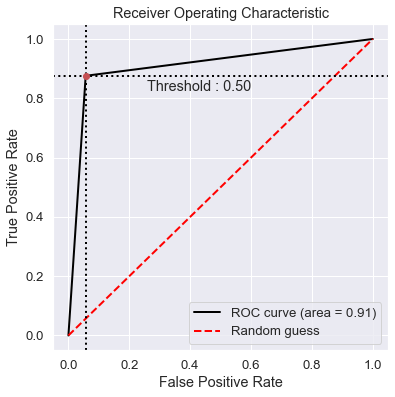

time: 297 ms (started: 2021-08-23 20:52:04 -03:00)


In [220]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test_SMOTE, y_pred_RF_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(6,6))
bc.plot_roc_curve()
plt.show()

---

## RF Features importance evaluation:

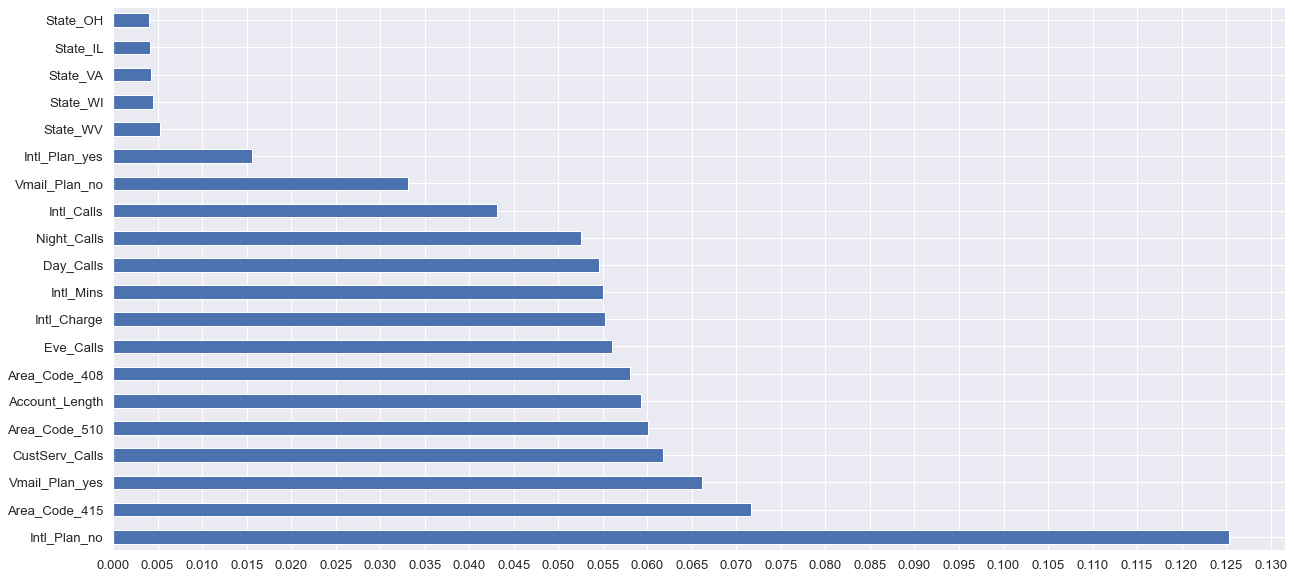

time: 52 s (started: 2021-08-23 20:52:16 -03:00)


In [221]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train_SMOTE, y_train_SMOTE)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_SMOTE.columns)
plt.figure(figsize=(21,10))
#plt.axis([0, 0.16, 0, 120])
plt.xticks(np.arange(0,0.16,0.005))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Explicabilidad

In [222]:
import shap
shap_values = shap.TreeExplainer(randomForest).shap_values(X_train_SMOTE)
shap.summary_plot(shap_values, X_train_SMOTE, plot_type="bar")

time: 6min 7s (started: 2021-08-23 20:53:08 -03:00)


___
___

## Gradient Boosted Trees Model 3/3:

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

GB_Tree_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)

GB_Tree_clf.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions for the test dataset
y_pred_GB_Tree_clf_test = GB_Tree_clf.predict(X_test_SMOTE)

# Get and reshape confusion matrix data
matrix4 = confusion_matrix(y_test_SMOTE, y_pred_GB_Tree_clf_test)
matrix4 = matrix4.astype('float') / matrix4.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix4, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn No', 'Churn Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gradient Boosted Trees Model')
plt.show()

time: 12.7 s (started: 2021-08-23 21:00:33 -03:00)


### Classification report

In [227]:
# View the classification report for test data and predictions
print(classification_report(y_test_SMOTE, y_pred_GB_Tree_clf_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       811
           1       0.93      0.90      0.91       781

    accuracy                           0.92      1592
   macro avg       0.92      0.92      0.92      1592
weighted avg       0.92      0.92      0.92      1592

time: 16 ms (started: 2021-08-23 21:00:46 -03:00)


In [228]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test_SMOTE, y_pred_GB_Tree_clf_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(6,6))
bc.plot_roc_curve()
plt.show()

time: 265 ms (started: 2021-08-23 21:00:46 -03:00)


___
___

### Archivo de predicción

In [290]:
predictions = randomForest.predict(X_test_SMOTE)
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
#from google.colab import files
res.to_csv('prediction_results_CASO2_TELCO.csv')         
#files.download('prediction_results.csv')

time: 109 ms (started: 2021-08-24 00:17:46 -03:00)
